In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import sys
sys.path.append('../')
import compression as C

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import cPickle as pickle

In [4]:
with open('/home/d/data/mri_results_all.p', 'rb') as f:
    results_all = pickle.load(f)

In [11]:
# SETUP

# Iterations
N = 1

# DEFAULT --------------------------------------------------
# Compression methods
def_coms = [
    C.BOCKWURST,
    C.LZMA,
    C.ZLIB
]

# Encoding methods
def_encs = [
    C.NE,
    C.NG,
    C.RLE
]

# ALL ------------------------------------------------------
# compression methods
all_coms = [
    C.BOCKWURST,
    C.BROTLI,
    C.BZ2,
    C.JPEG2000,
    C.LZ78,
    C.LZF,
    C.LZMA,
    C.LZO,
    C.LZW,
    C.PNG,
    C.X264,
    C.ZLIB,
    C.ZOPFLI,
    C.ZSTD
]

# encoding methods
all_encs = [
    C.NE,
    C.RLE,
    C.NG,
    C.BOCKWURST
]

# ENCODING ONLY -------------------------------------------
# Compression methods
enc_only_coms = [
    C.NC
]

# encoding methods
enc_only_encs = [
    C.RLE,
    C.NG,
    C.BOCKWURST
]

In [10]:
results_all['ratios']

[682.0561021221238,
 474.35139777345825,
 533.539491415601,
 741.727011986538,
 632.1602140206107,
 649.6218848162471,
 727.2899726354005,
 472.27834703299175,
 557.0055485696973,
 16.46672559716201,
 502.2968174605551,
 596.6133904678929,
 808.7354061219571,
 1176.2547806425605,
 56.19185434583653,
 168.02188252289963,
 241.9405467278348,
 316.35725262810536,
 435.34780408692825,
 742.2069057046164,
 809.4182125195996,
 661.158046146874,
 77.92039700481509,
 161.0789278504924,
 249.16965804032225,
 322.9298718796992,
 102.98804514301322,
 154.63869558404687,
 354.14582970526925,
 422.97013128620137,
 262.01197053047485,
 195.8227964820748,
 259.23119325238093,
 295.3312752357167,
 481.80105178138734,
 484.63851175688944,
 304.4887510577431,
 367.96275897236256,
 561.5875010983401,
 537.5116258580227,
 234.6168454320435,
 312.75466914600355,
 447.91947858647006,
 497.53942534743464]

In [69]:
results_all.keys()

['enc_speed',
 'dec_speed_std',
 'methods',
 'total_comp_speed_std',
 'comp_speed_std',
 'comp_speed',
 'bytes',
 'decomp_speed',
 'ratios',
 'total_decomp_speed',
 'dec_speed',
 'enc_speed_std',
 'total_comp_speed',
 'decomp_speed_std',
 'total_decomp_speed_std']

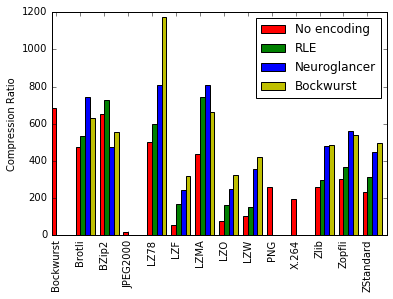

In [68]:
labels = []



for i,m in enumerate(results_all['methods']):
    labels.append(m.split('\n')[0])
    
labels = sorted(list(set(labels)), key=lambda s: s.lower())

ne = [0]*len(labels)
rle = [0]*len(labels)
ng = [0]*len(labels)
bockwurst = [0]*len(labels)


what = 'ratios'
for i,m in enumerate(labels):

    ne_index = m
    if ne_index in results_all['methods']:
        ne_index = results_all['methods'].index(ne_index)
    else:
        ne_index = -1
    rle_index = m+'\n with RLE'
    if rle_index in results_all['methods']:
        rle_index = results_all['methods'].index(rle_index)
    else:
        rle_index = -1
    ng_index = m+'\n with Neuroglancer'
    if ng_index in results_all['methods']:
        ng_index = results_all['methods'].index(ng_index)    
    else:
        ng_index = -1        
    bockwurst_index = m+'\n with Bockwurst'
    if bockwurst_index in results_all['methods']:
        bockwurst_index = results_all['methods'].index(bockwurst_index)   
    else:
        bockwurst_index = -1        
    
    if ne_index != -1:
        ne[i] = results_all[what][ne_index]
    if rle_index != -1:
        rle[i] = results_all[what][rle_index]
    if ng_index != -1:
        ng[i] = results_all[what][ng_index]
    if bockwurst_index != -1:
        bockwurst[i] = results_all[what][bockwurst_index]

plt.figure(figsize=(10,10))
N = len(labels)
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax=plt.subplots()
data1 = ax.bar(ind, ne, width, color='r', label='No encoding')
data2 = ax.bar(ind+ width, rle, width, color='g', label='RLE')
data3 = ax.bar(ind+ width*2, ng, width, color='b', label='Neuroglancer')
data4 = ax.bar(ind+ width*3, bockwurst, width, color='y', label='Bockwurst')

plt.ylabel('Compression Ratio')

plt.legend(
    loc='upper right'
)

v = ax.set_xticks(ind + width)
v = ax.set_xticklabels(labels, rotation = 'vertical')        
        

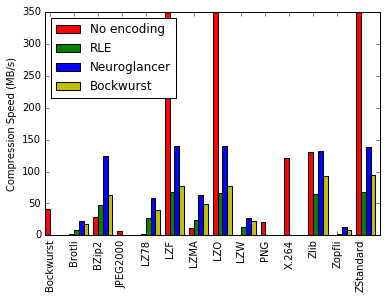

In [81]:
labels = []



for i,m in enumerate(results_all['methods']):
    labels.append(m.split('\n')[0])
    
labels = sorted(list(set(labels)), key=lambda s: s.lower())

ne = [0]*len(labels)
rle = [0]*len(labels)
ng = [0]*len(labels)
bockwurst = [0]*len(labels)


what = 'total_comp_speed'
for i,m in enumerate(labels):

    ne_index = m
    if ne_index in results_all['methods']:
        ne_index = results_all['methods'].index(ne_index)
    else:
        ne_index = -1
    rle_index = m+'\n with RLE'
    if rle_index in results_all['methods']:
        rle_index = results_all['methods'].index(rle_index)
    else:
        rle_index = -1
    ng_index = m+'\n with Neuroglancer'
    if ng_index in results_all['methods']:
        ng_index = results_all['methods'].index(ng_index)    
    else:
        ng_index = -1        
    bockwurst_index = m+'\n with Bockwurst'
    if bockwurst_index in results_all['methods']:
        bockwurst_index = results_all['methods'].index(bockwurst_index)   
    else:
        bockwurst_index = -1        
    
    if ne_index != -1:
        ne[i] = results_all[what][ne_index]
    if rle_index != -1:
        rle[i] = results_all[what][rle_index]
    if ng_index != -1:
        ng[i] = results_all[what][ng_index]
    if bockwurst_index != -1:
        bockwurst[i] = results_all[what][bockwurst_index]

plt.figure(figsize=(10,10))
N = len(labels)
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax=plt.subplots()
data1 = ax.bar(ind, ne, width, color='r', label='No encoding')
data2 = ax.bar(ind+ width, rle, width, color='g', label='RLE')
data3 = ax.bar(ind+ width*2, ng, width, color='b', label='Neuroglancer')
data4 = ax.bar(ind+ width*3, bockwurst, width, color='y', label='Bockwurst')

plt.ylabel('Compression Speed (MB/s)')

plt.legend(
    loc='upper left'
)

# ax.set_yscale("log", nonposy='clip')
ax.set_ylim(0,350)

v = ax.set_xticks(ind + width)
v = ax.set_xticklabels(labels, rotation = 'vertical')        
        

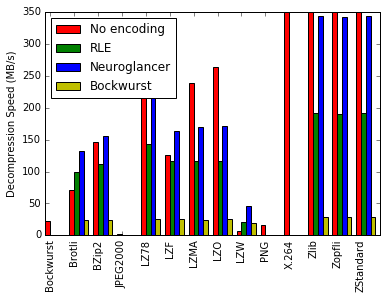

In [108]:
labels = []



for i,m in enumerate(results_all['methods']):
    labels.append(m.split('\n')[0])
    
labels = sorted(list(set(labels)), key=lambda s: s.lower())

ne = [0]*len(labels)
rle = [0]*len(labels)
ng = [0]*len(labels)
bockwurst = [0]*len(labels)


what = 'total_decomp_speed'
for i,m in enumerate(labels):

    ne_index = m
    if ne_index in results_all['methods']:
        ne_index = results_all['methods'].index(ne_index)
    else:
        ne_index = -1
    rle_index = m+'\n with RLE'
    if rle_index in results_all['methods']:
        rle_index = results_all['methods'].index(rle_index)
    else:
        rle_index = -1
    ng_index = m+'\n with Neuroglancer'
    if ng_index in results_all['methods']:
        ng_index = results_all['methods'].index(ng_index)    
    else:
        ng_index = -1        
    bockwurst_index = m+'\n with Bockwurst'
    if bockwurst_index in results_all['methods']:
        bockwurst_index = results_all['methods'].index(bockwurst_index)   
    else:
        bockwurst_index = -1        
    
    if ne_index != -1:
        ne[i] = results_all[what][ne_index]
    if rle_index != -1:
        rle[i] = results_all[what][rle_index]
    if ng_index != -1:
        ng[i] = results_all[what][ng_index]
    if bockwurst_index != -1:
        bockwurst[i] = results_all[what][bockwurst_index]

plt.figure(figsize=(10,10))
N = len(labels)
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax=plt.subplots()
data1 = ax.bar(ind, ne, width, color='r', label='No encoding')
data2 = ax.bar(ind+ width, rle, width, color='g', label='RLE')
data3 = ax.bar(ind+ width*2, ng, width, color='b', label='Neuroglancer')
data4 = ax.bar(ind+ width*3, bockwurst, width, color='y', label='Bockwurst')

plt.ylabel('Decompression Speed (MB/s)')

plt.legend(
    loc='upper left'
)

# ax.set_yscale("log", nonposy='clip')
ax.set_ylim(0,350)

v = ax.set_xticks(ind + width)
v = ax.set_xticklabels(labels, rotation = 'vertical')        
        

In [82]:
with open('/home/d/data/mri_results_enc_only.p', 'rb') as f:
    results_enc_only = pickle.load(f)

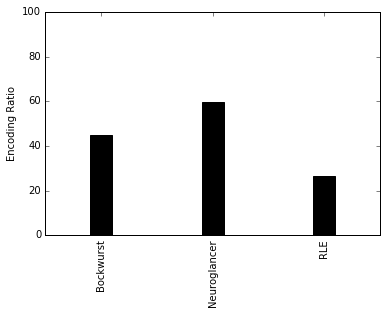

In [105]:
labels = []

results = results_enc_only

for i,m in enumerate(results['methods']):
    labels.append(m.split('\n')[0])
    
labels = sorted(list(set(labels)), key=lambda s: s.lower())

ne = [0]*len(labels)
rle = [0]*len(labels)
ng = [0]*len(labels)
bockwurst = [0]*len(labels)


what = 'ratios'
for i,m in enumerate(labels):

    ne_index = m
    if ne_index in results['methods']:
        ne_index = results['methods'].index(ne_index)
    else:
        ne_index = -1
    rle_index = m+'\n with RLE'
    if rle_index in results['methods']:
        rle_index = results['methods'].index(rle_index)
    else:
        rle_index = -1
    ng_index = m+'\n with Neuroglancer'
    if ng_index in results['methods']:
        ng_index = results['methods'].index(ng_index)    
    else:
        ng_index = -1        
    bockwurst_index = m+'\n with Bockwurst'
    if bockwurst_index in results['methods']:
        bockwurst_index = results['methods'].index(bockwurst_index)   
    else:
        bockwurst_index = -1        
    
    if ne_index != -1:
        ne[i] = results[what][ne_index]
    if rle_index != -1:
        rle[i] = results[what][rle_index]
    if ng_index != -1:
        ng[i] = results[what][ng_index]
    if bockwurst_index != -1:
        bockwurst[i] = results[what][bockwurst_index]

plt.figure(figsize=(10,10))
N = len(labels)
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax=plt.subplots()
data1 = ax.bar(ind, ne, width, color='black', label='No encoding', align='center')
# data2 = ax.bar(ind+ width, rle, width, color='g', label='RLE')
# data3 = ax.bar(ind+ width*2, ng, width, color='b', label='Neuroglancer')
# data4 = ax.bar(ind+ width*3, bockwurst, width, color='y', label='Bockwurst')

plt.ylabel('Encoding Ratio')

# plt.legend(
#     loc='upper right'
# )

ax.set_ylim(0,100)

v = ax.set_xticks(ind)# + width)
v = ax.set_xticklabels(labels, rotation = 'vertical')        
        

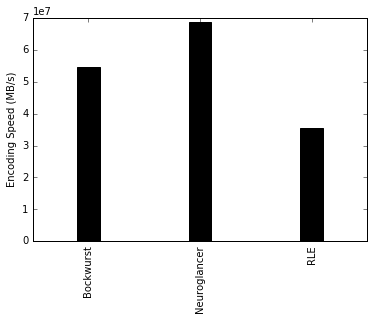

In [111]:
labels = []

results = results_enc_only

for i,m in enumerate(results['methods']):
    labels.append(m.split('\n')[0])
    
labels = sorted(list(set(labels)), key=lambda s: s.lower())

ne = [0]*len(labels)
rle = [0]*len(labels)
ng = [0]*len(labels)
bockwurst = [0]*len(labels)


what = 'enc_speed'
for i,m in enumerate(labels):

    ne_index = m
    if ne_index in results['methods']:
        ne_index = results['methods'].index(ne_index)
    else:
        ne_index = -1
    rle_index = m+'\n with RLE'
    if rle_index in results['methods']:
        rle_index = results['methods'].index(rle_index)
    else:
        rle_index = -1
    ng_index = m+'\n with Neuroglancer'
    if ng_index in results['methods']:
        ng_index = results['methods'].index(ng_index)    
    else:
        ng_index = -1        
    bockwurst_index = m+'\n with Bockwurst'
    if bockwurst_index in results['methods']:
        bockwurst_index = results['methods'].index(bockwurst_index)   
    else:
        bockwurst_index = -1        
    
    if ne_index != -1:
        ne[i] = results[what][ne_index]
    if rle_index != -1:
        rle[i] = results[what][rle_index]
    if ng_index != -1:
        ng[i] = results[what][ng_index]
    if bockwurst_index != -1:
        bockwurst[i] = results[what][bockwurst_index]

plt.figure(figsize=(10,10))
N = len(labels)
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax=plt.subplots()
data1 = ax.bar(ind, ne, width, color='black', label='No encoding', align='center')
# data2 = ax.bar(ind+ width, rle, width, color='g', label='RLE')
# data3 = ax.bar(ind+ width*2, ng, width, color='b', label='Neuroglancer')
# data4 = ax.bar(ind+ width*3, bockwurst, width, color='y', label='Bockwurst')

plt.ylabel('Encoding Speed (MB/s)')

# plt.legend(
#     loc='upper right'
# )

# ax.set_ylim(0,100)

v = ax.set_xticks(ind)# + width)
v = ax.set_xticklabels(labels, rotation = 'vertical')        
        

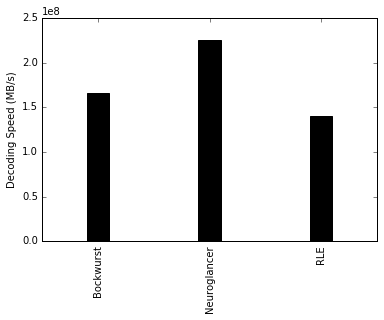

In [119]:
labels = []

results = results_enc_only

for i,m in enumerate(results['methods']):
    labels.append(m.split('\n')[0])
    
labels = sorted(list(set(labels)), key=lambda s: s.lower())

ne = [0]*len(labels)
rle = [0]*len(labels)
ng = [0]*len(labels)
bockwurst = [0]*len(labels)


what = 'dec_speed'
for i,m in enumerate(labels):

    ne_index = m
    if ne_index in results['methods']:
        ne_index = results['methods'].index(ne_index)
    else:
        ne_index = -1
    rle_index = m+'\n with RLE'
    if rle_index in results['methods']:
        rle_index = results['methods'].index(rle_index)
    else:
        rle_index = -1
    ng_index = m+'\n with Neuroglancer'
    if ng_index in results['methods']:
        ng_index = results['methods'].index(ng_index)    
    else:
        ng_index = -1        
    bockwurst_index = m+'\n with Bockwurst'
    if bockwurst_index in results['methods']:
        bockwurst_index = results['methods'].index(bockwurst_index)   
    else:
        bockwurst_index = -1        
    
    if ne_index != -1:
        ne[i] = results[what][ne_index]
    if rle_index != -1:
        rle[i] = results[what][rle_index]
    if ng_index != -1:
        ng[i] = results[what][ng_index]
    if bockwurst_index != -1:
        bockwurst[i] = results[what][bockwurst_index]

plt.figure(figsize=(10,10))
N = len(labels)
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax=plt.subplots()
data1 = ax.bar(ind, ne, width, color='black', label='No encoding', align='center')
# data2 = ax.bar(ind+ width, rle, width, color='g', label='RLE')
# data3 = ax.bar(ind+ width*2, ng, width, color='b', label='Neuroglancer')
# data4 = ax.bar(ind+ width*3, bockwurst, width, color='y', label='Bockwurst')

plt.ylabel('Decoding Speed (MB/s)')

# plt.legend(
#     loc='upper right'
# )

ax.get_yaxis().get_major_formatter().set_useOffset(False)
v = ax.set_xticks(ind)# + width)
v = ax.set_xticklabels(labels, rotation = 'vertical')        
        